In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

In [3]:
df=pd.read_csv("ConnectFour-c1.1t1.0-c1.1t1.0.csv")
df

,Agent1,Agent2,Steps
0,1.0,-1.0,35
1,-1.0,1.0,28
2,-1.0,1.0,24
3,-1.0,1.0,24
4,-1.0,1.0,34
...,...,...,...
495,-1.0,1.0,34
496,0.0,0.0,42
497,1.0,-1.0,21
498,-1.0,1.0,34


In [4]:
df.describe()

,Agent1,Agent2,Steps
count,500.000000,500.000000,500.000000
mean,0.088000,-0.088000,32.476000
std,0.968572,0.968572,6.280152
min,-1.000000,-1.000000,14.000000
25%,-1.000000,-1.000000,29.000000
50%,1.000000,-1.000000,34.000000
75%,1.000000,1.000000,36.000000
max,1.000000,1.000000,42.000000


In [5]:
np.mean(df.Agent1==1.0)

0.516

In [6]:
np.mean(df.Agent2==1.0)

0.428

In [7]:
def winpercentages(env="ConnectFour", t1=1.0, t2=1.0, c1=1.0, c2=1.0, e1=0.01, e2=0.02, treepolicy1="ucb", treepolicy2="ucb"):
    if treepolicy1 == "epsilon_greedy" and treepolicy2 == "epsilon_greedy":
        filename = f"{env}-e{e1}t{t1}-e{e2}t{t2}.csv"
    elif treepolicy1 == "epsilon_greedy" and treepolicy2 == "ucb":
        filename = f"{env}-e{e1}t{t1}-c{c2}t{t2}.csv"
    elif treepolicy1 == "ucb" and treepolicy2 == "epsilon_greedy":
        filename = f"{env}-c{c1}t{t1}-e{e2}t{t2}.csv"
    elif treepolicy1 == "ucb" and treepolicy2 == "ucb":
        filename = f"{env}-c{c1}t{t1}-c{c2}t{t2}.csv"
    df=pd.read_csv(filename)
    return np.mean(df.Agent1==1.0), np.mean(df.Agent2==1.0), np.mean(df.Steps)
        

In [8]:
winpercentages(env="ConnectFour", t1=1.0,t2=1.0,c1=1.1,c2=1.1,treepolicy1="ucb",treepolicy2="ucb")

(0.516, 0.428, 32.476)

In [13]:
ucbs = [1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]
epss = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10]
e1=0.01
c1=1.4
arr=np.array([winpercentages(e1=min(e1,e2),e2=max(e1,e2),treepolicy1="epsilon_greedy",treepolicy2="epsilon_greedy") for e2 in epss])
arr
    

array([[ 0.584,  0.38 , 25.232],
       [ 0.434,  0.534, 27.862],
       [ 0.338,  0.604, 28.898],
       [ 0.32 ,  0.632, 28.9  ],
       [ 0.29 ,  0.662, 28.198],
       [ 0.25 ,  0.702, 28.446],
       [ 0.236,  0.738, 28.276],
       [ 0.232,  0.732, 27.904],
       [ 0.186,  0.776, 27.978],
       [ 0.192,  0.774, 27.568]])

In [21]:
e1=0.01
w1list=[]
w2list=[]
slist=[]
tielist=[]
for e2 in epss:
    if e1<=e2:
        w1,w2,s=winpercentages(e1=min(e1,e2),e2=max(e1,e2),treepolicy1="epsilon_greedy",treepolicy2="epsilon_greedy")
        w1list.append(w1)
        w2list.append(w2)
        slist.append(s)
        tielist.append(1-w1-w2)
    elif e1>e2:
        w1,w2,s=winpercentages(e1=min(e1,e2),e2=max(e1,e2),treepolicy1="epsilon_greedy",treepolicy2="epsilon_greedy")
        w1list.append(w2)
        w2list.append(w1)
        slist.append(s)
        tielist.append(1-w1-w2)
print(w1list)
print(w2list)
print(tielist)

[0.584, 0.434, 0.338, 0.32, 0.29, 0.25, 0.236, 0.232, 0.186, 0.192]
[0.38, 0.534, 0.604, 0.632, 0.662, 0.702, 0.738, 0.732, 0.776, 0.774]
[0.03600000000000003, 0.03200000000000003, 0.05799999999999994, 0.04799999999999993, 0.04799999999999993, 0.04800000000000004, 0.026000000000000023, 0.03600000000000003, 0.038000000000000034, 0.03400000000000003]


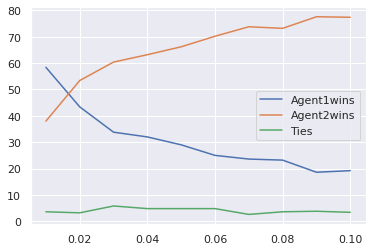

In [22]:
plt.plot(epss,100*np.array(w1list),label="Agent1wins")
plt.plot(epss,100*np.array(w2list),label="Agent2wins")
plt.plot(epss,100*np.array(tielist),label="Ties")
plt.legend()

In [30]:
e1=0.05
w1list=[]
w2list=[]
slist=[]
tielist=[]
for e2 in epss:
    if e1<=e2:
        w1,w2,s=winpercentages(e1=min(e1,e2),e2=max(e1,e2),treepolicy1="epsilon_greedy",treepolicy2="epsilon_greedy")
        w1list.append(w1)
        w2list.append(w2)
        slist.append(s)
        tielist.append(1-w1-w2)
print(w1list)

[0.492, 0.51, 0.466, 0.416, 0.436, 0.348]


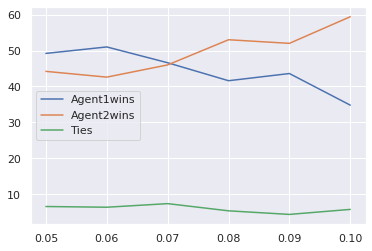

In [31]:
plt.plot(epss[4:],100*np.array(w1list),label="Agent1wins")
plt.plot(epss[4:],100*np.array(w2list),label="Agent2wins")
plt.plot(epss[4:],100*np.array(tielist),label="Ties")
plt.legend()

In [33]:
e1=0.1
w1list=[]
w2list=[]
slist=[]
tielist=[]
for e2 in epss:
    if e1>=e2:
        w1,w2,s=winpercentages(e1=min(e1,e2),e2=max(e1,e2),treepolicy1="epsilon_greedy",treepolicy2="epsilon_greedy")
        w1list.append(w2)
        w2list.append(w1)
        slist.append(s)
        tielist.append(1-w1-w2)
print(w1list)

[0.774, 0.71, 0.614, 0.566, 0.594, 0.494, 0.488, 0.49, 0.45, 0.418]


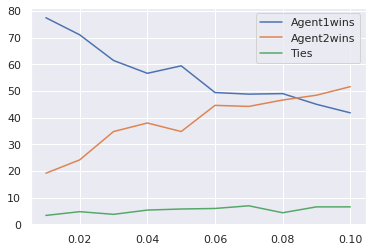

In [35]:
plt.plot(epss,100*np.array(w1list),label="Agent1wins")
plt.plot(epss,100*np.array(w2list),label="Agent2wins")
plt.plot(epss,100*np.array(tielist),label="Ties")
plt.legend()